# Time Series data generation

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Equation of a wave: y(x,t) = a * sin (ω*x + φ) 

a = amplitude of the wave (min max values)

ω = angular frequency (how many cycles occur in a second)

x = number of points

φ = phase of the signal (where do we start)

In [132]:
sample=1000
noise = 0.04*np.random.rand(sample)
noise2 = 300*np.random.rand(sample)
def timeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65:
        for i in range(len(amplitude)):
            y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    else:
        for i in range(len(amplitude)):
            y += (np.sin(frequency[i]*x+phase[i])*amplitude[i])+noise
    return y

def timeseriesPeak(timeseries,x):
    start = np.random.randint(len(x))
    end = start+100
    
    peak = np.sin(0.001*x)*300
    peak += np.random.rand(1000)
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseries+peak, peak


def timeseriesDec(amplitude,frequency,phase,x,slope):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65 :
        for i in range(len(amplitude)):
              y += (np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x)+noise2
    else:
         for i in range(len(amplitude)):
              y += (np.sin(frequency[i]*x-phase[i])*amplitude[i]-slope[i]*x)
        
    return y

def timeseriesPeakDec(timeseriesDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peakDec = np.sin(0.01*x)*200+500*x
    peakDec += np.random.rand(1000)
    
    peakDec[x<start]=0
    peakDec[x>end]=0
    
    return timeseriesDec+peakDec, peakDec

def updwntimeseries(amplitude,frequency,phase,x):
    y = np.zeros(len(x))
    number = random.uniform(0,1)
    if number<0.65:
        for i in range(len(amplitude)):
            y += np.sin(frequency[i]*x+phase[i])*amplitude[i]
    else:
        for i in range(len(amplitude)):
            y += (np.sin(frequency[i]*x+phase[i])*amplitude[i])+noise
    return y

def updwntimeseriesPeak(timeseriesPeakDec,x):
    start = np.random.randint(len(x))
    end = start+80
    
    peak = np.sin(0.001*x)*60
    
    peak[x<start]=0
    peak[x>end]=0
    
    return timeseriesPeakDec+peak, peak

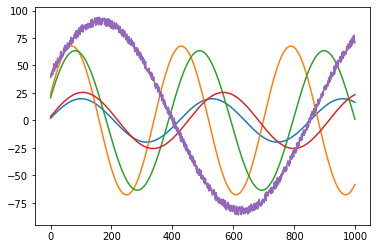

In [133]:
# vectors for w phase and amplitude regular shape
# these arrrays contain 200 random values between (0,1) and we multiply the w by 0.02 to
# ensure cycles in the time series 
p1 = np.random.rand(200)
a1 = np.random.rand(200)
w1 = np.ones(200)*0.02

x = np.arange(start=0, stop=(1000))
peak=np.zeros(1000)
# We will create 200 time series, we will multiply the w phase and amplitude
# to obtain different results
yValues = []
peak = np.zeros(1000)
for i in range(1,200):
    rand_w = np.random.uniform(0.3,1)
    rand = np.random.uniform(0,1)
    y=timeseries(a1*rand,w1*rand_w,p1*rand,x)
    yValues.append((y,peak))
    if i <= 5:
        plt.plot(x,y)


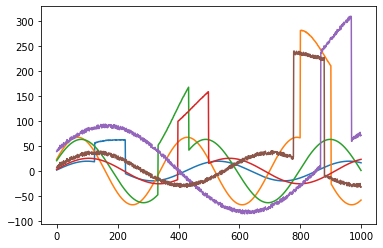

In [134]:
# We will create 200 time series with spikes
ySpikes = []
for i in range(0,len(yValues)):
    y, peak = timeseriesPeak(yValues[i][0],x)
    ySpikes.append((y,peak))
    if i <= 5:
        plt.plot(x,y)
      

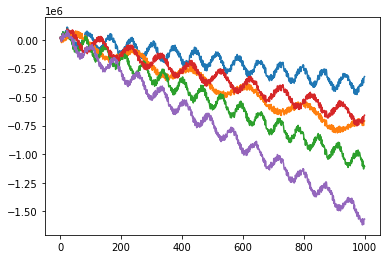

In [135]:
p2 = np.random.rand(200)
a2 = np.random.randint(100,600,200)
w2 = np.ones(200)

b = np.ones(200)

x = np.arange(start=0, stop=(1000))
yValuesDec = []
for i in range(1,200):
    rand_w = np.random.uniform(0.02,0.1)
    rand = np.random.uniform(1,10)
    y = timeseriesDec(a2,w2*rand_w,p2,x,b*rand)
    yValuesDec.append(y)
    if i <= 5:
        plt.plot(x,y)



#z = (np.sin(x*0.02-150)*400-4*x)+0.4*(10**15)


#plt.plot(x,z)


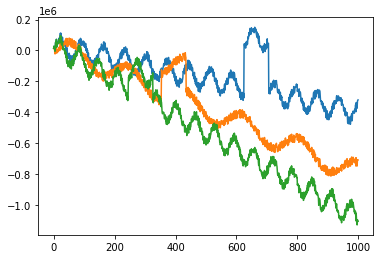

In [136]:
# We will create 200 time series with spikes
ySpikesDec = []
for i in range(0,len(yValuesDec)):
    y, peakDec = timeseriesPeakDec(yValuesDec[i],x)
    ySpikesDec.append((y,peakDec))
    if i <= 2:
        plt.plot(x,y)

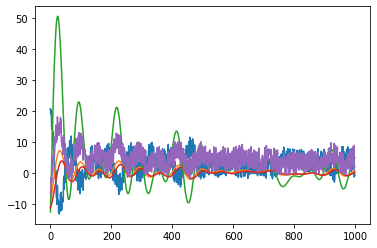

In [137]:
w3 = np.random.rand(200)*0.1#+0.1
p3 = np.random.rand(200)
a3 = np.random.rand(200)*0.1#+0.1

x = np.arange(start=0, stop=1000)

yValuesupdwn = []
for i in range(1,200):
  randa = np.random.uniform(1,10)
  randp = np.random.uniform(1,20)
  y = updwntimeseries(a3*randa,w3,p3+randp,x)
  yValuesupdwn.append(y)
  if i <= 5:
      plt.plot(x,y)


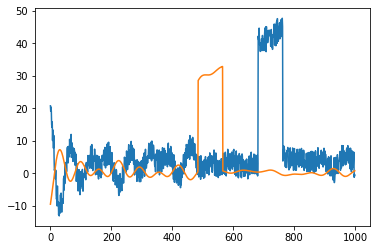

In [138]:
ySpikesupdwn = []
for i in range(0,len(yValuesupdwn)):
    y, peakupdwn = updwntimeseriesPeak(yValuesupdwn[i],x)
    ySpikesupdwn.append((y,peakupdwn))
    if i <= 1:
        plt.plot(x,y)

In [139]:
def timeseries2Df(ts,peak):
  peak[peak > 0] = 1
  d = { 'value': ts , 'anomaly':peak}
  return pd.DataFrame(data=d)


In [140]:
data = yValues + ySpikes  + ySpikesupdwn

In [141]:
def timeseries2Df(data):
    values = []
    peaks = []
    for i in range(len(data)):
        peak = [1 if x > 0 else 0 for x in data[i][1]]
        values.append(data[i][0])
        peaks.append(peak)
    d = { 'value': values , 'anomaly':peaks}
    return pd.DataFrame(data=d)

In [165]:
df = timeseries2Df(data)
df

,value,anomaly
0,"[2.01110015026234, 2.2980675044886505, 2.58454...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[23.53601634102382, 24.64019187408312, 25.7368...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[20.73997913428036, 21.659513288750002, 22.573...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[3.3657092784330054, 3.709907535926808, 4.0534...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[39.161292158300355, 39.23114921195034, 42.363...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
592,"[9.818959966234186, 13.582298971148331, 20.348...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
593,"[-11.712382537249688, -9.92980506943472, -8.11...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
594,"[19.882174135150933, 19.02318711246215, 21.159...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
595,"[-13.438438050232786, -11.186077180634513, -8....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scaleDf(df):
  test = df['value']
  test = [item for sublist in test for item in sublist] 
  test = scaler.fit_transform(np.array(test).reshape(-1, 1))
  scaled = []
  test= [item for sublist in test for item in sublist]
  for i in range(0,len(test),1000):
    scaled.append(test[i:i+1000])
  df['value']=scaled
  return df


In [178]:
df=scaleDf(df)
df

,value,anomaly
0,"[0.23644213905470604, 0.23713446295365861, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0.28837213625593155, 0.29103601804916435, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0.28162654881512983, 0.28384497353022975, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0.2397102051234069, 0.2405406015992822, 0.241...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0.32606893945221116, 0.3262374732838126, 0.33...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
592,"[0.2552790132519214, 0.2643582673712166, 0.280...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
593,"[0.20333351223183174, 0.20763407452411747, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
594,"[0.27955704894766426, 0.2774846973859303, 0.28...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
595,"[0.19916931214092298, 0.20460325170276852, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


(array([ 31804.,  84319., 345858.,  94398.,  28413.,   4224.,   3537.,
          2722.,   1281.,    444.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

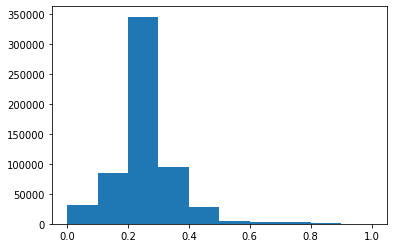

In [160]:
plt.hist(test)

1000

(array([176.,  78.,  63.,  57.,  56.,  61.,  73.,  80.,  96., 260.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

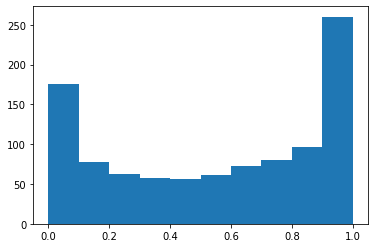

In [158]:
df['value'][0] = scaler.fit_transform(np.array(df["value"][0]).reshape(-1, 1))
df['value'][0]
plt.hist(df['value'][0])

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['value'] = scaler.fit_transform(np.array(df["value"]).reshape(-1, 1))
df

,value,anomaly
0,0.226681,0
1,0.226970,0
2,0.227259,0
3,0.227547,0
4,0.227836,0
...,...,...
596995,0.235451,0
596996,0.234579,0
596997,0.247200,0
596998,0.246149,0


Reshape it to 

Number of TS | Length single | Value | Anomaly

1000 | 1000 | 

(array([3.29410e+04, 8.66040e+04, 3.56394e+05, 9.05310e+04, 1.92270e+04,
        3.05700e+03, 3.26800e+03, 2.99200e+03, 1.66200e+03, 3.24000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

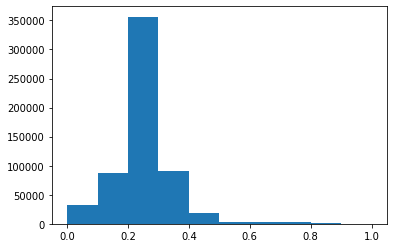

In [105]:
plt.hist(df['value'])

In [106]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
from tensorflow import keras
from tensorflow.keras import layers

In [108]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D
from keras.models import Model

input_layer = Input(shape=(1000, 1))
conv1 = Conv1D(filters=32,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(32, return_sequences=True)(conv1)
output_layer = Dense(1, activation='softmax')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1000, 1)]         0         
                                                                 
 conv1d_11 (Conv1D)          (None, 1000, 32)          288       
                                                                 
 lstm_11 (LSTM)              (None, 1000, 32)          8320      
                                                                 
 dense_10 (Dense)            (None, 1000, 1)           33        
                                                                 
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['value'].to_numpy().reshape(-1,1000,1), df['anomaly'].to_numpy().reshape(-1,1000,1), test_size=0.3)

In [110]:
np.unique(y_test)

array([0, 1])

In [111]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

historytrain = model.fit(X_train, y_train, epochs=40, batch_size=32 , validation_split = 0.1)
historytest = model.evaluate(X_test, y_test)

Epoch 1/40
12/12 [==============================] - 12s 770ms/step - loss: 0.6242 - accuracy: 0.0573 - val_loss: 0.5343 - val_accuracy: 0.0644
Epoch 2/40
12/12 [==============================] - 7s 622ms/step - loss: 0.3868 - accuracy: 0.0573 - val_loss: 0.2608 - val_accuracy: 0.0644
Epoch 3/40
12/12 [==============================] - 4s 329ms/step - loss: 0.2300 - accuracy: 0.0573 - val_loss: 0.2503 - val_accuracy: 0.0644
Epoch 4/40
12/12 [==============================] - 4s 356ms/step - loss: 0.2250 - accuracy: 0.0573 - val_loss: 0.2426 - val_accuracy: 0.0644
Epoch 5/40
12/12 [==============================] - 5s 459ms/step - loss: 0.2212 - accuracy: 0.0573 - val_loss: 0.2388 - val_accuracy: 0.0644
Epoch 6/40
12/12 [==============================] - 6s 461ms/step - loss: 0.2192 - accuracy: 0.0573 - val_loss: 0.2355 - val_accuracy: 0.0644
Epoch 7/40
12/12 [==============================] - 4s 359ms/step - loss: 0.2161 - accuracy: 0.0573 - val_loss: 0.2313 - val_accuracy: 0.0644
Epoch

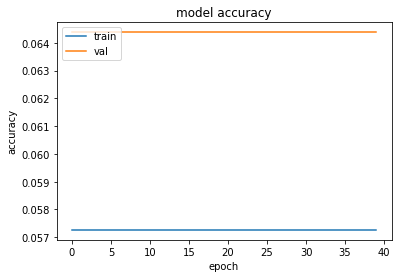

In [112]:
plt.plot(historytrain.history['accuracy'])
plt.plot(historytrain.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

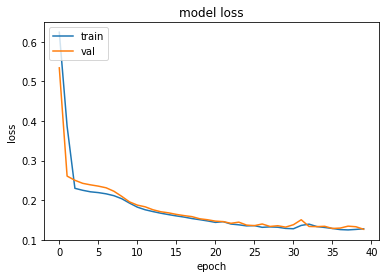

In [113]:
plt.plot(historytrain.history['loss'])
plt.plot(historytrain.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [44]:
data = ySpikesupdwn + ySpikes
df = timeseries2Df(data)
scaler = MinMaxScaler()
df['value'] = scaler.fit_transform(np.array(df["value"]).reshape(-1, 1))
df

,value,anomaly
0,0.258071,0.0
1,0.267809,0.0
2,0.261806,0.0
3,0.258982,0.0
4,0.259286,0.0
...,...,...
397995,0.250329,0.0
397996,0.251613,0.0
397997,0.252885,0.0
397998,0.254146,0.0


In [46]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D
from keras.models import Model

input_layer = Input(shape=(1000, 1))
conv1 = Conv1D(filters=64,
               kernel_size=32,
               strides=1,
               activation='relu',
               padding='same')(input_layer)
lstm1 = LSTM(64, return_sequences=True)(conv1)
output_layer = Dense(1, activation='sigmoid')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1000, 1)]         0         
                                                                 
 conv1d_6 (Conv1D)           (None, 1000, 64)          2112      
                                                                 
 lstm_6 (LSTM)               (None, 1000, 64)          33024     
                                                                 
 dense_5 (Dense)             (None, 1000, 1)           65        
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['value'], df['anomaly'], test_size=0.3)

In [48]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

historytrain = model.fit(X_train, y_train, epochs=40, batch_size=1000 , validation_split = 0.1)
historytest = model.evaluate(X_test, y_test)

Epoch 1/40


248/251 [============================>.] - ETA: 0s - loss: -55.1864 - accuracy: 0.0038

251/251 [==============================] - 56s 14ms/step - loss: -55.7247 - accuracy: 0.0038 - val_loss: -97.3503 - val_accuracy: 0.0000e+00
Epoch 2/40
251/251 [==============================] - 3s 12ms/step - loss: -96.8300 - accuracy: 0.0000e+00 - val_loss: -97.5714 - val_accuracy: 0.0000e+00
Epoch 3/40
251/251 [==============================] - 3s 12ms/step - loss: -97.1350 - accuracy: 0.0000e+00 - val_loss: -98.0296 - val_accuracy: 0.0000e+00
Epoch 4/40
251/251 [==============================] - 3s 12ms/step - loss: -97.7166 - accuracy: 0.0000e+00 - val_loss: -98.8403 - val_accuracy: 0.0000e+00
Epoch 5/40
251/251 [==============================] - 3s 12ms/step - loss: -98.7489 - accuracy: 0.0000e+00 - val_loss: -100.3240 - val_accuracy: 0.0000e+00
Epoch 6/40
251/251 [==============================] - 3s 12ms/step - loss: -100.6527 - accuracy: 0.0112 - val_loss: -102.7893 - val_accuracy: 0.0782
Epoch 7/40
251/251 [==============================] - 3s 13ms/step - loss: -102.7208 - ac

In [ ]:
df_val = df[["val","valS","decvals","udval"]]
df_ano = df[["valspike","decspike","udspikes"]]

KeyError: "None of [Index(['val', 'valS', 'decvals', 'udval'], dtype='object')] are in the [columns]"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_val.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=["val","valS","decvals","udval"])
df_scaled

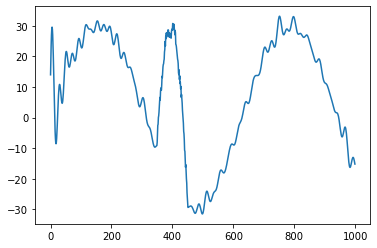

In [ ]:
randcomp = 200

w_rand_ampl=0.2
w_rand_offs=0.1

w = np.random.rand(200)*0.2+0.1
p = np.random.rand(200)
a = np.random.rand(200)*0.1+0.1

x = np.arange(start=0, stop=1000)

y = np.zeros(1000)
for i in range(200):
  y += np.sin(w[i]*x+p[i])*a[i]

peak = -0.02*(x-400)**2+50
peak += np.random.rand(1000)*3
peak[x<350]=0
peak[x>450]=0
#plt.plot(x,peak)
plt.plot(x,y+peak+np.sin(0.01*x)*30)



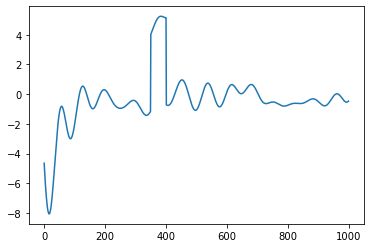

In [ ]:
w = np.random.rand(200)*0.1#+0.1
p = np.random.rand(200)
a = np.random.rand(200)*0.1#+0.1

x = np.arange(start=0, stop=1000)

y = np.zeros(1000)
for i in range(200):
  y -= np.sin(w[i]*x+p[i])*a[i]
  

#peak = 0.01*(x-100)
peak = np.sin(0.001*x)*15
peak[x<350]=0
peak[x>400]=0
plt.plot(x,y+peak)

476
576


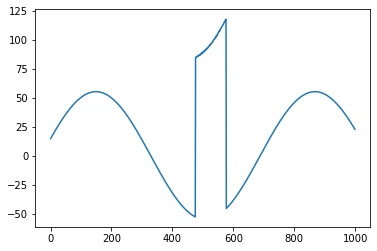

In [ ]:
start = np.random.randint(900)
end = start+100
print(start)
print(end)

peak = np.sin(0.001*x)*300
peak += np.random.rand(1000)
peak[x<start]=0
peak[x>end]=0
plt.plot(x,yValues[25]+peak)
#plt.plot(x,peak)